In [1]:
# ==================================================
# Fashion-MNIST Classification: Basic TensorFlow
# ==================================================
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# -------------------------
# 1. Load Dataset
# -------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize images to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Add channel dimension for CNN
x_train_cnn = x_train[..., np.newaxis]
x_test_cnn  = x_test[..., np.newaxis]

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat  = to_categorical(y_test)

classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# -------------------------
# 2. Build Models
# -------------------------
# 2.1 MLP
mlp = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 2.2 CNN
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# -------------------------
# 3. Train Models
# -------------------------
# MLP
mlp_history = mlp.fit(x_train, y_train_cat, epochs=6, batch_size=128, validation_split=0.1)

# CNN
cnn_history = cnn.fit(x_train_cnn, y_train_cat, epochs=6, batch_size=128, validation_split=0.1)


Epoch 1/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8419 - loss: 0.4462 - val_accuracy: 0.8617 - val_loss: 0.3727
Epoch 2/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8474 - loss: 0.4379 - val_accuracy: 0.8562 - val_loss: 0.3719
Epoch 3/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8469 - loss: 0.4329 - val_accuracy: 0.8685 - val_loss: 0.3628
Epoch 4/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8457 - loss: 0.4330 - val_accuracy: 0.8693 - val_loss: 0.3549
Epoch 5/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8535 - loss: 0.4147 - val_accuracy: 0.8693 - val_loss: 0.3536
Epoch 6/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8510 - loss: 0.4223 - val_accuracy: 0.8658 - val_loss: 0.3492
Epoch 1/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.6192 - loss: 1.0994 - val_accuracy: 0.8328 - val_loss: 0.4448
Epoch 2/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 69s 164ms/step - accuracy: 0.8063 - loss: 0.5367 - val_accuracy: 0.8

In [7]:
# -------------------------
# 4. Evaluate on Test Set
# -------------------------
mlp_loss, mlp_acc = mlp.evaluate(x_test, y_test_cat)
cnn_loss, cnn_acc = cnn.evaluate(x_test_cnn, y_test_cat)

print(f"MLP Test Accuracy: {mlp_acc:.4f}")
print(f"CNN Test Accuracy: {cnn_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8619 - loss: 0.3696
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8840 - loss: 0.3235
MLP Test Accuracy: 0.8579
CNN Test Accuracy: 0.8823


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


<Figure size 800x800 with 0 Axes>

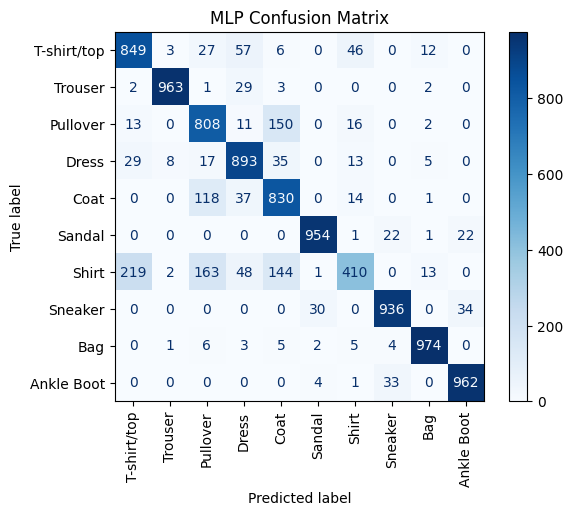

<Figure size 800x800 with 0 Axes>

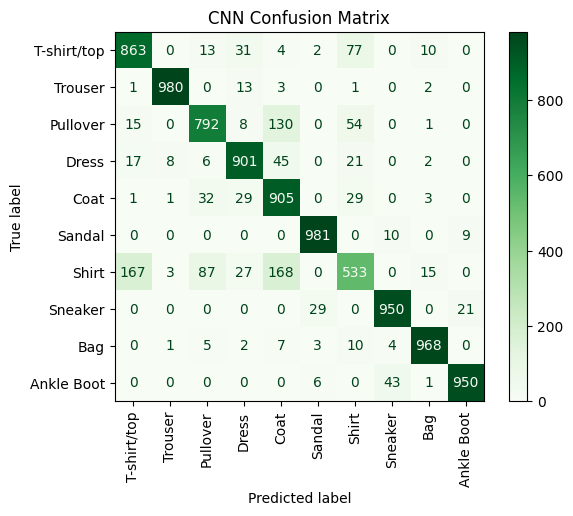

In [8]:
# -------------------------
# 5. Confusion Matrices
# -------------------------
mlp_preds = np.argmax(mlp.predict(x_test), axis=1)
cnn_preds = np.argmax(cnn.predict(x_test_cnn), axis=1)

# MLP Confusion Matrix
mlp_cm = confusion_matrix(y_test, mlp_preds)
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay(mlp_cm, display_labels=classes).plot(cmap='Blues', xticks_rotation='vertical')
plt.title("MLP Confusion Matrix")
plt.show()

# CNN Confusion Matrix
cnn_cm = confusion_matrix(y_test, cnn_preds)
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay(cnn_cm, display_labels=classes).plot(cmap='Greens', xticks_rotation='vertical')
plt.title("CNN Confusion Matrix")
plt.show()


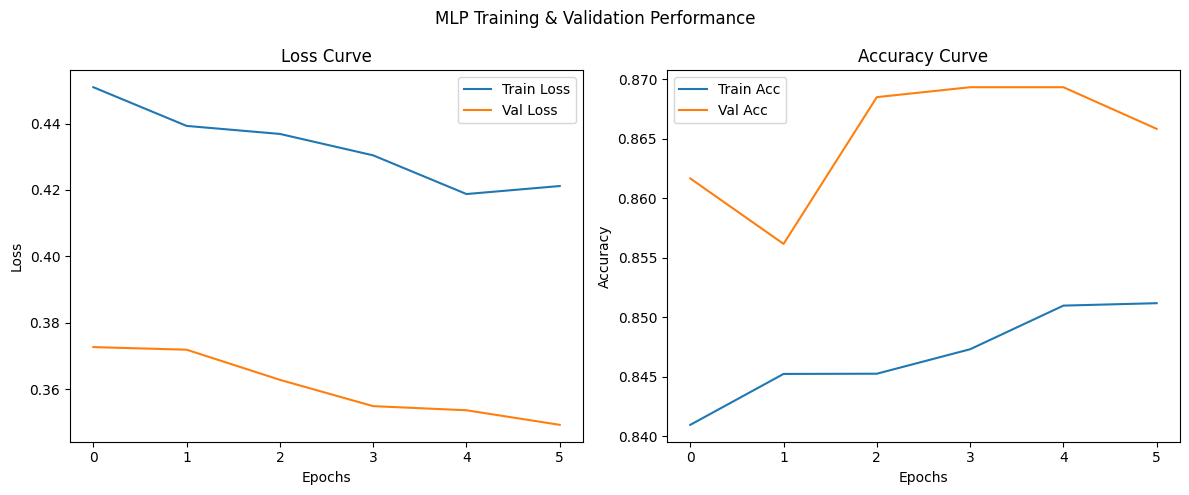

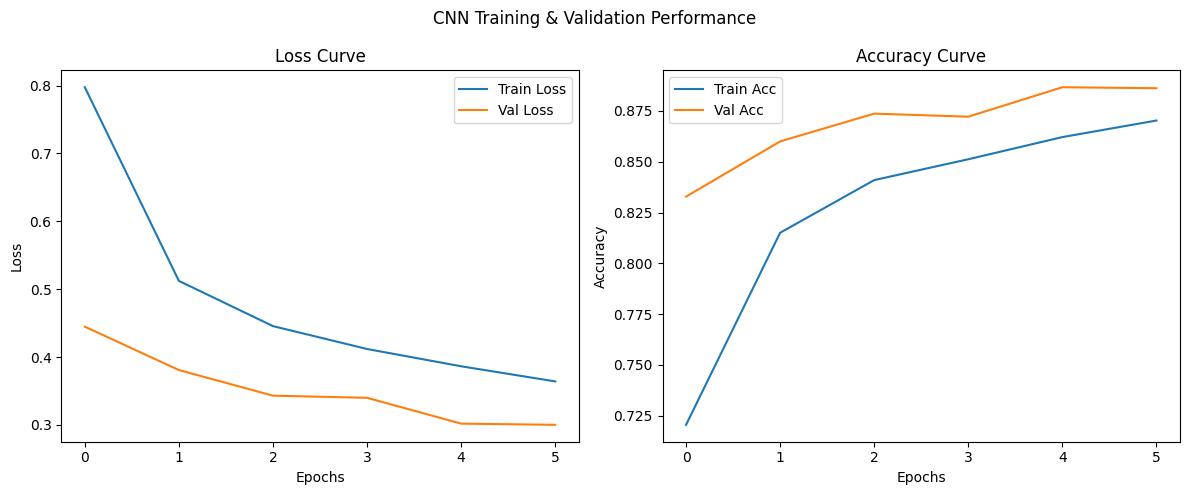

In [9]:
# -------------------------
# 6. Plot Loss & Accuracy Curves
# -------------------------
def plot_history(history, title):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.title('Loss Curve'); plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.title('Accuracy Curve'); plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_history(mlp_history, "MLP Training & Validation Performance")
plot_history(cnn_history, "CNN Training & Validation Performance")

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 1. Load Dataset
# -------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm  = x_test.astype('float32') / 255.0

# For CNN, add channel dimension
x_train_cnn = x_train_norm[..., np.newaxis]
x_test_cnn  = x_test_norm[..., np.newaxis]

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat  = tf.keras.utils.to_categorical(y_test)

classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']


In [34]:
# -------------------------
# 2. Data Augmentation (CNN)
# -------------------------
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=False,
    validation_split=0.1
)
train_gen = datagen.flow(x_train_cnn, y_train_cat, subset='training', batch_size=128)
val_gen   = datagen.flow(x_train_cnn, y_train_cat, subset='validation', batch_size=128)


In [35]:
# -------------------------
# 3. Build Upgraded ANN (MLP)
# -------------------------
mlp = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:
# -------------------------
# 4. Build Optimized CNN
# -------------------------
cnn = models.Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [38]:
# -------------------------
# 5. Callbacks
# -------------------------
early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# -------------------------
# 6. Train ANN
# -------------------------
history_mlp = mlp.fit(x_train_norm, y_train_cat,
                      epochs=5,
                      batch_size=128,
                      validation_split=0.1,
                      callbacks=[early_stop])


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8159 - loss: 0.5216 - val_accuracy: 0.8422 - val_loss: 0.4257
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8392 - loss: 0.4502 - val_accuracy: 0.8597 - val_loss: 0.3879
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8503 - loss: 0.4191 - val_accuracy: 0.8610 - val_loss: 0.3658
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8586 - loss: 0.3931 - val_accuracy: 0.8703 - val_loss: 0.3518
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8614 - loss: 0.3803 - val_accuracy: 0.8710 - val_loss: 0.3492


In [39]:
# -------------------------
# 7. Train CNN
# -------------------------
history_cnn = cnn.fit(train_gen,
                      epochs=5,
                      validation_data=val_gen,
                      callbacks=[early_stop])


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 269s 624ms/step - accuracy: 0.6524 - loss: 0.9412 - val_accuracy: 0.8497 - val_loss: 0.4127
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 308s 593ms/step - accuracy: 0.8268 - loss: 0.4634 - val_accuracy: 0.8763 - val_loss: 0.3391
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 251s 595ms/step - accuracy: 0.8547 - loss: 0.3917 - val_accuracy: 0.8910 - val_loss: 0.2921
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 245s 581ms/step - accuracy: 0.8710 - loss: 0.3462 - val_accuracy: 0.8935 - val_loss: 0.2829
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 250s 592ms/step - accuracy: 0.8807 - loss: 0.3230 - val_accuracy: 0.9020 - val_loss: 0.2673


In [40]:
# -------------------------
# 8. Evaluate Models
# -------------------------
mlp_loss, mlp_acc = mlp.evaluate(x_test_norm, y_test_cat)
cnn_loss, cnn_acc = cnn.evaluate(x_test_cnn, y_test_cat)
print(f"Upgraded ANN (MLP) Test Accuracy: {mlp_acc:.4f}")
print(f"Optimized CNN Test Accuracy: {cnn_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8684 - loss: 0.3633
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.9001 - loss: 0.2731
Upgraded ANN (MLP) Test Accuracy: 0.8642
Optimized CNN Test Accuracy: 0.9018


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step


<Figure size 800x800 with 0 Axes>

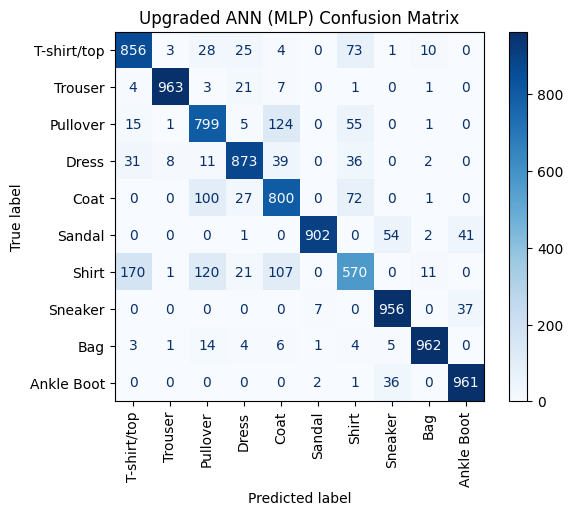

<Figure size 800x800 with 0 Axes>

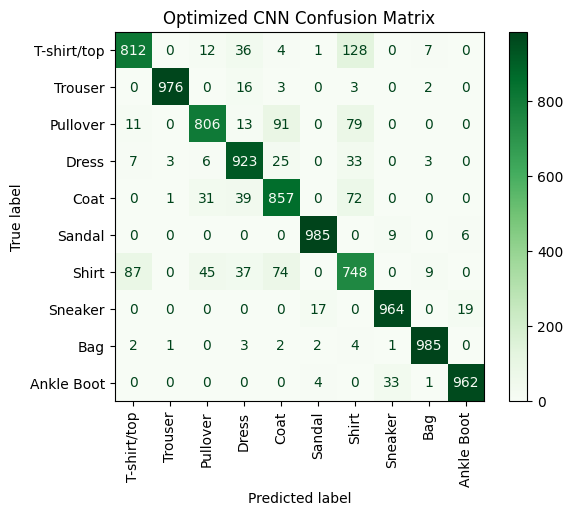

In [41]:
# -------------------------
# 9. Confusion Matrices
# -------------------------
mlp_preds = np.argmax(mlp.predict(x_test_norm), axis=1)
cnn_preds = np.argmax(cnn.predict(x_test_cnn), axis=1)

plt.figure(figsize=(8,8))
ConfusionMatrixDisplay(confusion_matrix(y_test, mlp_preds), display_labels=classes).plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Upgraded ANN (MLP) Confusion Matrix")
plt.show()

plt.figure(figsize=(8,8))
ConfusionMatrixDisplay(confusion_matrix(y_test, cnn_preds), display_labels=classes).plot(cmap='Greens', xticks_rotation='vertical')
plt.title("Optimized CNN Confusion Matrix")
plt.show()


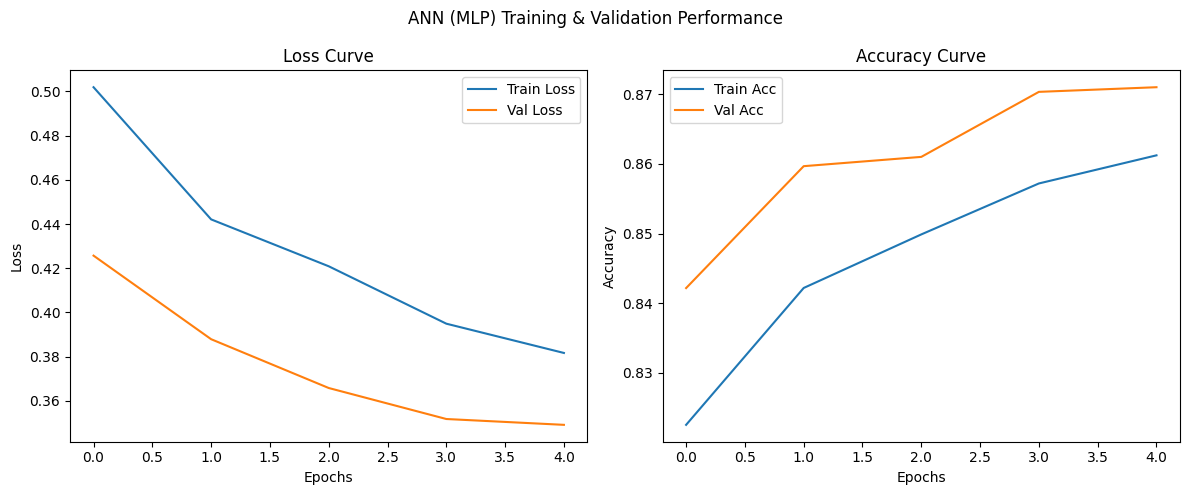

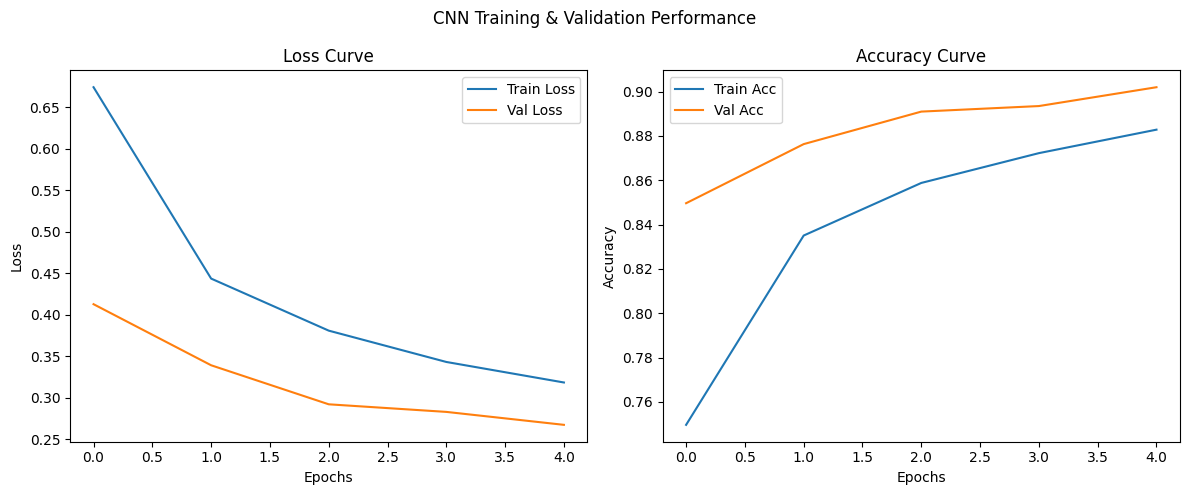

In [42]:
# -------------------------
# 10. Plot Loss & Accuracy
# -------------------------
def plot_history(history, title):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.title('Loss Curve'); plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.title('Accuracy Curve'); plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_history(history_mlp, "ANN (MLP) Training & Validation Performance")
plot_history(history_cnn, "CNN Training & Validation Performance")